In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def truncar(numero, decimales = 0):
    return np.trunc(numero*10**decimales)/(10**decimales)

In [3]:
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras = 3):
    texto = str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
    return texto

In [4]:
datos = pd.read_csv(
    #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    skiprows = [1],
    encoding = 'ascii'
    )

In [5]:
resumen(datos)

Forma:
 (14442, 38) 

 Columnas:
 Index(['Year', 'DoY', 'Hour', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH',
       'VPD', 'Ustar', 'TS1', 'TS2', 'TS3', 'TS4', 'U', 'DIR', 'PP', 'QG1',
       'QG2', 'WET', 'PAR', 'TSH1', 'HS1', 'GH1', 'TSH2', 'HS2', 'GH2', 'TSH3',
       'HS3', 'GH3', 'TSH4', 'HS4', 'GH4', 'PAR.1', '   r_err_co2[%]',
       '   noise_co2[%]'],
      dtype='object') 

 Tipos:
 Year               float64
DoY                float64
Hour               float64
NEE                float64
LE                 float64
H                  float64
Rg                 float64
Tair               float64
Tsoil              float64
rH                 float64
VPD                float64
Ustar              float64
TS1                float64
TS2                float64
TS3                float64
TS4                float64
U                  float64
DIR                float64
PP                 float64
QG1                float64
QG2                float64
WET                float64
PAR     

In [6]:
datos['Error porcent'] = datos['   r_err_co2[%]'] + datos['   noise_co2[%]']
datos['Error'] = abs(datos['Error porcent']/100 * datos['NEE'])

In [7]:
datos_validos = datos[pd.notna(datos['NEE'])
                      & (datos['Ustar'] > 0.14167)
                      #& (datos['Error porcent'] > 40)
                      #& (datos['Error'] > 0.5)
                     ]
datos_validos.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,6844.0,6844.000000,6844.000000,6844.000000,6726.000000,6810.000000,5.982000e+03,5982.000000,5982.000000,5982.000000,...,5744.000000,5744.000000,5981.000000,5981.000000,5981.000000,5.982000e+03,6844.000000,6844.000000,6844.000000,6844.000000
mean,2018.0,250.204851,12.360243,-1.256528,68.246966,50.869161,2.296868e+02,13.472918,12.021010,70.370412,...,0.535460,0.209827,12.542949,0.403816,0.291302,4.522042e+02,16.908692,1.454154,18.362847,0.463620
std,0.0,68.875279,6.401216,3.648935,83.507212,115.465247,2.963448e+02,5.528582,3.978940,15.859974,...,0.030832,0.026400,3.078220,0.038184,0.040390,5.523499e+02,27.473167,2.845853,29.750422,1.036091
min,2018.0,91.000000,0.125000,-21.042500,-205.078369,-138.818542,1.808498e-12,-1.405000,1.940000,22.510000,...,0.444500,0.147000,7.200000,0.200000,0.111000,1.831424e-12,5.653092,0.084813,6.510600,0.000019
1%,2018.0,95.000000,0.125000,-12.452538,-21.250128,-73.045969,1.000000e-02,1.756450,4.298575,30.611200,...,0.455500,0.166000,7.400000,0.243000,0.171000,2.071121e-12,7.234445,0.223415,8.153687,0.006315
10%,2018.0,152.000000,3.125000,-5.935590,-4.665306,-46.665908,2.000000e-02,7.051000,7.137750,47.030500,...,0.469500,0.174000,8.800000,0.350500,0.241500,2.150000e-01,8.531594,0.440545,9.390023,0.058149
25%,2018.0,196.000000,7.625000,-3.297888,7.176043,-29.758855,2.500000e-02,9.725000,8.710000,59.531250,...,0.540000,0.190000,9.700000,0.385000,0.274000,2.710000e+00,9.545371,0.593727,10.363106,0.129776
50%,2018.0,258.500000,12.625000,-0.543850,38.076417,-3.188124,7.067250e+01,12.852500,11.817500,73.015000,...,0.546500,0.209000,12.300000,0.409000,0.305500,1.767000e+02,11.186810,0.812834,12.005402,0.274546
75%,2018.0,308.000000,17.125000,1.112800,105.603119,106.550990,4.062375e+02,16.958750,15.112500,83.250000,...,0.551500,0.227500,15.200000,0.430500,0.318000,8.214250e+02,14.499003,1.157860,15.529049,0.512147
90%,2018.0,336.000000,21.125000,2.486565,189.706043,233.122934,7.088350e+02,20.559500,17.475000,89.300000,...,0.558000,0.248500,16.930000,0.447500,0.338000,1.356500e+03,24.879218,2.550649,27.390228,0.849180


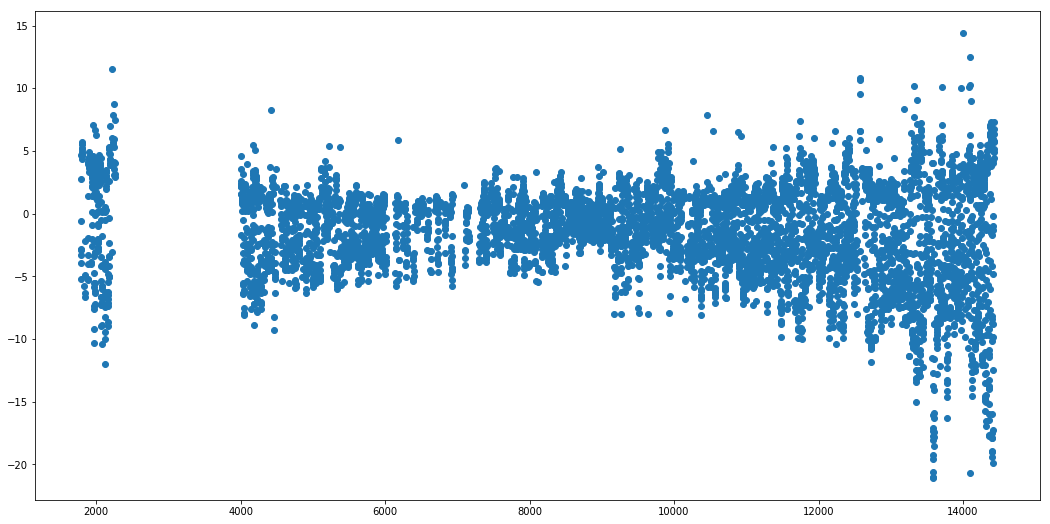

In [8]:
plt.figure(figsize=(18,9))
plt.plot(datos_validos.index, datos_validos['NEE'], 'o')

In [9]:
temp = np.arange(1, 28, 1)
rad = np.arange(0, 1250, 50)
tabla = np.zeros((len(temp), len(rad)))
for i in temp:
    for j in rad:
        tabla[i-1][int(j/50)] = datos[(datos['Tsoil'] > i)
                                      & (datos['Tsoil'] < i+1)
                                      & (datos['Rg'] > j)
                                      & (datos['Rg'] < j+50)
                                     ]['NEE'].mean()

In [10]:
tabla

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,  -3.8823    ,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,  -3.622     ,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan],
       [ -0.36924286,          nan,  -0.9005    ,  -1.9667    ,
                 nan,  -2.1418    ,  -3.54406667,  -2.11013333,
         -0.7614    ,  -2.7846    ,          nan,  -3.0357

In [11]:
datos_rellenar = datos[pd.isna(datos['NEE'])
                       | (datos['Ustar'] < 0.14167)
                       #& (datos['Error porcent'] > 40)
                       #& (datos['Error'] > 0.5)
                      ].fillna(-9999)
datos_rellenar.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,7590.0,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,...,7590.000000,7590.000000,7590.000000,7590.00000,7590.000000,7.590000e+03,7590.000000,7590.000000,7590.000000,7590.000000
mean,2018.0,162.898419,11.437434,-8278.346197,-7596.049634,-6596.375876,-592.281781,-684.282546,-684.485963,-622.841528,...,-5647.422806,-5647.569455,-683.333130,-696.51477,-696.684815,-5.744108e+02,-6524.845448,-6543.316185,-6523.361634,-8278.383394
std,0.0,80.355066,7.341372,3774.579878,4275.826999,4736.365347,2583.932594,2549.729436,2549.671298,2566.581898,...,4957.899950,4957.732868,2549.985839,2546.37482,2546.328273,2.657119e+03,4782.872774,4757.048701,4784.995436,3774.498220
min,2018.0,54.000000,0.125000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9.999000e+03,-9999.000000,-9999.000000,-9999.000000,-9999.000000
1%,2018.0,55.000000,0.125000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9.999000e+03,-9999.000000,-9999.000000,-9999.000000,-9999.000000
10%,2018.0,70.000000,2.125000,-9999.000000,-9999.000000,-9999.000000,0.015000,2.954500,5.396250,42.048500,...,-9999.000000,-9999.000000,8.265000,0.30700,0.135000,5.011547e-13,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2018.0,96.000000,4.625000,-9999.000000,-9999.000000,-9999.000000,0.020000,8.515000,8.665000,68.167500,...,-9999.000000,-9999.000000,9.615000,0.38050,0.163500,2.259526e-12,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,2018.0,140.000000,10.625000,-9999.000000,-9999.000000,-9999.000000,0.030000,12.902500,13.356250,84.250000,...,-9999.000000,-9999.000000,15.700000,0.41300,0.229000,1.660000e+00,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,2018.0,216.000000,18.625000,-9999.000000,-9999.000000,-13.127784,82.436250,17.365000,16.632500,90.150000,...,0.543000,0.190000,17.500000,0.45050,0.274000,5.625625e+01,18.276330,0.856118,19.206239,-9999.000000
90%,2018.0,285.000000,21.625000,0.629720,1.578447,-2.423329,424.520000,20.440500,18.655250,92.500000,...,0.549500,0.220000,19.231500,0.47500,0.312500,5.879100e+02,52.492553,3.629471,56.366895,0.195841


In [12]:
for i in list(range(datos_rellenar['Year'].count())):
    ts = datos_rellenar['Tsoil'].iloc[i]
    rg = datos_rellenar['Rg'].iloc[i]
    if ts == -9999 or rg == -9999:
        datos_rellenar['NEE'].iloc[i] = np.nan
    else:
        datos_rellenar['NEE'].iloc[i] = tabla[int(ts-1)][int(rg/50)]

In [13]:
datos_rellenar.describe()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,7590.0,7590.000000,7590.000000,6860.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,...,7590.000000,7590.000000,7590.000000,7590.00000,7590.000000,7.590000e+03,7590.000000,7590.000000,7590.000000,7590.000000
mean,2018.0,162.898419,11.437434,0.048290,-7596.049634,-6596.375876,-592.281781,-684.282546,-684.485963,-622.841528,...,-5647.422806,-5647.569455,-683.333130,-696.51477,-696.684815,-5.744108e+02,-6524.845448,-6543.316185,-6523.361634,-8278.383394
std,0.0,80.355066,7.341372,2.466077,4275.826999,4736.365347,2583.932594,2549.729436,2549.671298,2566.581898,...,4957.899950,4957.732868,2549.985839,2546.37482,2546.328273,2.657119e+03,4782.872774,4757.048701,4784.995436,3774.498220
min,2018.0,54.000000,0.125000,-12.737492,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9.999000e+03,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2018.0,96.000000,4.625000,-0.643783,-9999.000000,-9999.000000,0.020000,8.515000,8.665000,68.167500,...,-9999.000000,-9999.000000,9.615000,0.38050,0.163500,2.259526e-12,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,2018.0,140.000000,10.625000,0.851744,-9999.000000,-9999.000000,0.030000,12.902500,13.356250,84.250000,...,-9999.000000,-9999.000000,15.700000,0.41300,0.229000,1.660000e+00,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,2018.0,216.000000,18.625000,1.743411,-9999.000000,-13.127784,82.436250,17.365000,16.632500,90.150000,...,0.543000,0.190000,17.500000,0.45050,0.274000,5.625625e+01,18.276330,0.856118,19.206239,-9999.000000
max,2018.0,355.000000,23.625000,4.577567,374.796417,435.868134,1056.500000,32.145000,26.927500,96.500000,...,0.571000,0.265000,21.575000,0.48600,0.349500,1.857500e+03,2804.545746,513.350171,2960.108444,15.214300


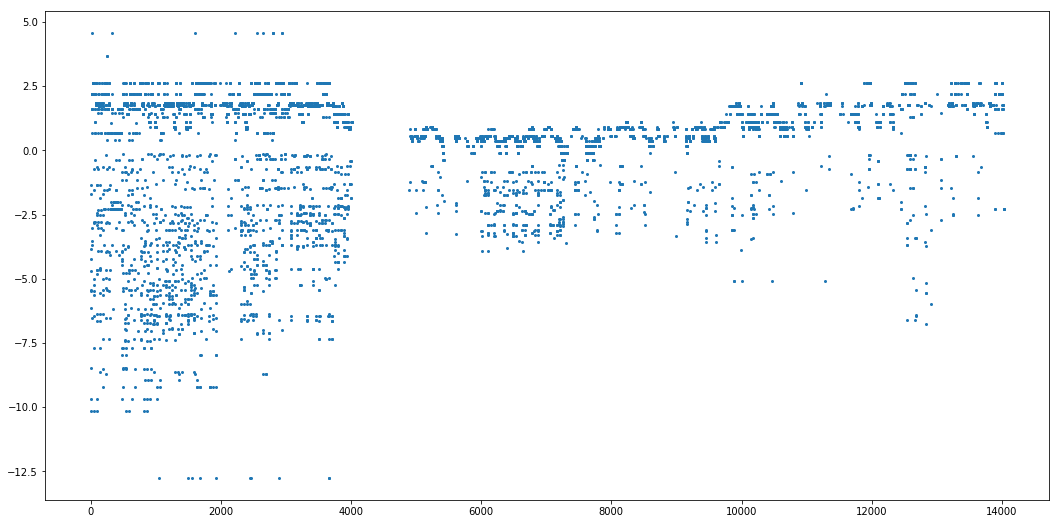

In [14]:
plt.figure(figsize=(18,9))
plt.plot(datos_rellenar.index, datos_rellenar['NEE'], 'o', ms = 2)

In [15]:
datos['NEE'].loc[datos_rellenar.index] = datos_rellenar['NEE']

In [16]:
datos.describe()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,14442.0,14442.000000,14442.000000,13712.000000,8555.000000,9400.000000,1.305000e+04,13050.000000,13050.000000,13050.000000,...,9053.000000,9053.000000,13049.000000,13049.000000,13049.000000,13029.000000,9474.000000,9.474000e+03,9474.000000,8158.000000
mean,2018.0,204.312422,11.876896,-0.602383,56.012561,35.628278,1.661355e+02,13.521831,12.737525,75.372464,...,0.536045,0.206270,13.647395,0.409373,0.258827,295.100309,28.289173,2.243100e+00,30.532273,0.487085
std,0.0,86.858873,6.927762,3.180661,81.555715,102.742627,2.660030e+02,5.714644,4.364592,16.040827,...,0.029022,0.026463,3.700381,0.044902,0.061050,480.599387,63.124829,7.234348e+00,68.869133,1.062064
min,2018.0,54.000000,0.125000,-21.042500,-396.093353,-138.818542,1.808498e-12,-1.990000,1.877500,17.445000,...,0.436500,0.147000,7.200000,0.179500,0.111000,0.000000,3.740930,8.315570e-14,4.026820,0.000019
25%,2018.0,129.000000,5.625000,-2.303750,1.120263,-25.090914,2.500000e-02,9.585000,9.047500,65.180000,...,0.540000,0.181000,10.095000,0.388000,0.221500,0.160000,10.070260,6.246975e-01,10.849436,0.129734
50%,2018.0,204.000000,12.125000,0.474024,23.651245,-5.718156,5.875000e-01,13.210000,12.807500,80.230000,...,0.545000,0.205000,14.000000,0.413500,0.273500,11.505000,12.712403,8.950726e-01,13.553833,0.271984
75%,2018.0,280.000000,18.125000,1.605550,88.453835,60.909068,2.530000e+02,17.368750,16.198750,88.550000,...,0.550500,0.224500,16.800000,0.439000,0.309000,430.800000,23.543854,1.679522e+00,25.556799,0.518239
max,2018.0,355.000000,23.625000,14.427700,462.813309,474.566895,1.190000e+03,32.485000,26.927500,96.500000,...,0.578000,0.265000,21.575000,0.486000,0.351500,2099.500000,2804.545746,5.133502e+02,2960.108444,33.907212


In [17]:
sin_rellenar = pd.read_csv(
    #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    skiprows = [1],
    encoding = 'ascii'
    )

In [18]:
faltantes = datos[pd.isna(datos['NEE'])][:]
for i in faltantes.index:
    desde = faltantes['DoY'].loc[i] - 7
    hasta = faltantes['DoY'].loc[i] + 7
    hora = faltantes['Hour'].loc[i]
    base = sin_rellenar[(sin_rellenar['DoY'] >= desde)
                        & (sin_rellenar['DoY'] < hasta)
                        & (sin_rellenar['Hour'] == hora)
                        ]
    faltantes.loc[i] = base['NEE'].mean()
datos['NEE'].loc[faltantes.index] = faltantes['NEE']

In [19]:
datos.to_csv('C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Relleno_LUT.txt',
             #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Relleno_LUT.txt',
             sep = '\t',
             na_rep = -9999,
             index = False,
             columns = ['DoY', 'Hour', 'NEE']
             )

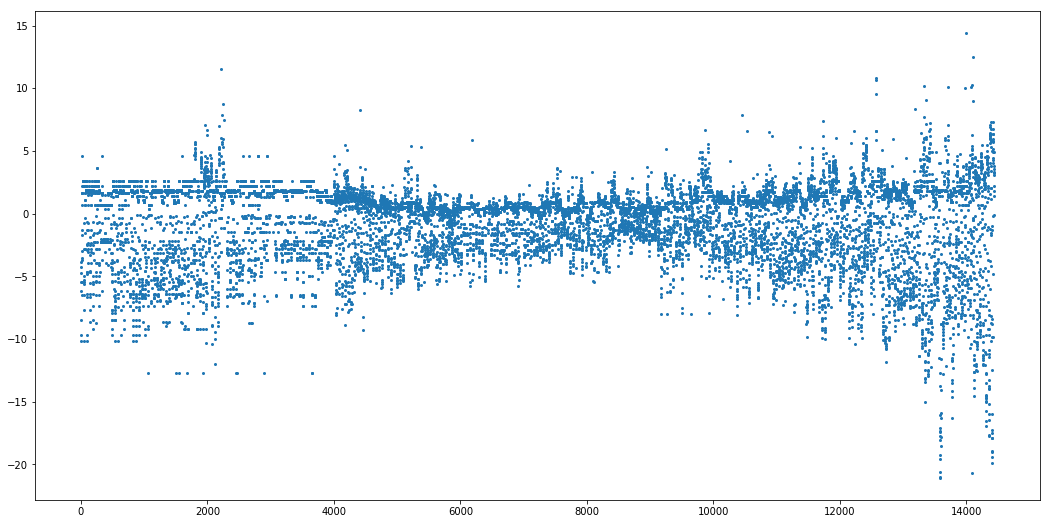

In [20]:
plt.figure(figsize=(18,9))
plt.plot(datos.index, datos['NEE'], 'o', ms = 2)

In [21]:
datos[pd.isna(datos['NEE'])].describe()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,159.0,159.000000,159.000000,0.0,0.0,0.0,158.000000,158.000000,158.000000,158.000000,...,0.0,0.0,158.000000,158.000000,158.000000,1.580000e+02,0.0,0.0,0.0,0.0
mean,2018.0,65.433962,15.111635,NaN,NaN,NaN,615.788924,26.516171,23.185348,51.669937,...,NaN,NaN,19.733639,0.322171,0.238915,9.030023e+02,NaN,NaN,NaN,NaN
std,0.0,24.147104,2.237995,NaN,NaN,NaN,303.901339,2.972417,1.557803,12.721748,...,NaN,NaN,0.891898,0.048947,0.037417,5.373487e+02,NaN,NaN,NaN,NaN
min,2018.0,54.000000,9.625000,NaN,NaN,NaN,0.020000,19.960000,20.157500,23.885000,...,NaN,NaN,16.800000,0.227000,0.133500,5.351275e-14,NaN,NaN,NaN,NaN
25%,2018.0,59.000000,13.625000,NaN,NaN,NaN,393.850000,23.990000,21.926875,41.628750,...,NaN,NaN,19.316250,0.297250,0.193500,4.558875e+02,NaN,NaN,NaN,NaN
50%,2018.0,62.000000,15.125000,NaN,NaN,NaN,641.975000,26.870000,23.025000,54.605000,...,NaN,NaN,19.700000,0.326000,0.256750,9.617500e+02,NaN,NaN,NaN,NaN
75%,2018.0,66.500000,16.625000,NaN,NaN,NaN,897.875000,28.725000,24.115000,60.571250,...,NaN,NaN,20.497500,0.357250,0.264875,1.381875e+03,NaN,NaN,NaN,NaN
max,2018.0,346.000000,20.625000,NaN,NaN,NaN,1056.500000,32.145000,26.927500,83.850000,...,NaN,NaN,21.430000,0.443000,0.271000,1.722500e+03,NaN,NaN,NaN,NaN


In [22]:
datos[(datos['DoY']>=70) & pd.isna(datos['NEE'])].head(60)

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
1064,2018.0,76.0,13.125,NaN,NaN,NaN,793.950,27.020,21.7075,39.310,...,NaN,NaN,17.660,0.3860,0.1650,1.277000e+03,NaN,NaN,NaN,NaN
1068,2018.0,76.0,15.125,NaN,NaN,NaN,751.650,28.500,21.9775,36.650,...,NaN,NaN,17.730,0.3970,0.1630,1.169000e+03,NaN,NaN,NaN,NaN
1069,2018.0,76.0,15.625,NaN,NaN,NaN,684.050,28.640,21.8700,37.135,...,NaN,NaN,17.850,0.3970,0.1640,1.117000e+03,NaN,NaN,NaN,NaN
1070,2018.0,76.0,16.125,NaN,NaN,NaN,565.400,28.710,21.6850,36.655,...,NaN,NaN,17.900,0.3935,0.1645,9.050000e+02,NaN,NaN,NaN,NaN
1355,2018.0,82.0,14.625,NaN,NaN,NaN,268.400,25.695,20.1575,50.095,...,NaN,NaN,16.800,0.4035,0.1510,3.407500e+02,NaN,NaN,NaN,NaN
1640,2018.0,88.0,13.125,NaN,NaN,NaN,814.500,27.425,21.0025,46.955,...,NaN,NaN,17.060,0.3980,0.1610,1.367500e+03,NaN,NaN,NaN,NaN
1641,2018.0,88.0,13.625,NaN,NaN,NaN,797.050,28.150,21.2800,43.425,...,NaN,NaN,17.070,0.3985,0.1610,1.326500e+03,NaN,NaN,NaN,NaN
1642,2018.0,88.0,14.125,NaN,NaN,NaN,762.300,28.410,21.4025,42.260,...,NaN,NaN,17.140,0.3960,0.1615,1.308500e+03,NaN,NaN,NaN,NaN
1643,2018.0,88.0,14.625,NaN,NaN,NaN,714.350,28.730,21.4650,41.255,...,NaN,NaN,17.195,0.3935,0.1620,1.154000e+03,NaN,NaN,NaN,NaN
2698,2018.0,110.0,14.125,NaN,NaN,NaN,396.700,28.315,21.0975,58.615,...,NaN,NaN,17.645,0.4430,0.1390,8.700000e-01,NaN,NaN,NaN,NaN
